# 4 分布图

## 4.1 连续变量直方图

横坐标：发动机排量<br>
纵坐标：频数<br>
图例：汽车类型

### 4.1.1 导入绘图的包

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #用不到
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei'] #显示中文
plt.rcParams['axes.unicode_minus'] = False #显示负号

### 4.1.2 认识绘制连续变量直方图的函数

In [2]:
plt.hist?

**plt.hist**

重要参数：

>x：绘图数据<br>
>bins = None：控制直方图的分组数（即条形的个数）<br>
>range = None：直方图横坐标的范围<br>
>density = None：如果设定True，则纵坐标表示为概率密度的值<br>
>weights = None：设定每个数据的权重，长度与x相同<br>
>cumulative = False：如果设定为True，则直方图累积显示<br>
>histtype = 'bar'：绘制直方图的类型，默认为'bar'<br>
>>'bar'：传统的直方图<br>
>>'barstacked'：堆叠的直方图<br>
>>'step'：默认未填充的线图<br>
>>'stepfilled'：默认填充的线图<br>

>align = 'mid'：直方图对齐方式，可选项{'left', 'mid', 'right'}<br>
>orientation = 'vertical'：控制直方图的方向，{'horizontal', 'vertical'}<br>
>color = None：直方图的颜色<br>
>label = None：标签<br>
>stacked = False：控制堆叠参数

返回结果：

>n：直方图纵坐标的值<br>
>bins：直方图箱体<br>
>patches：patches对象

### 4.1.3 导入绘图数据集

In [3]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [4]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
df.shape

(234, 11)

In [6]:
name = ['汽车制造商', '型号名称', '发动机排量(L)', '制造年份', '气缸数量', '手动/自动', '驱动类型', '城市里程/加仑', '公路里程/加仑', '汽油种类', '车辆类型']

In [7]:
[*zip(df.columns, name)]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆类型')]

(array([43., 39., 32., 23., 30., 29., 13., 19.,  4.,  2.]),
 array([1.6 , 2.14, 2.68, 3.22, 3.76, 4.3 , 4.84, 5.38, 5.92, 6.46, 7.  ]),
 <a list of 10 Patch objects>)

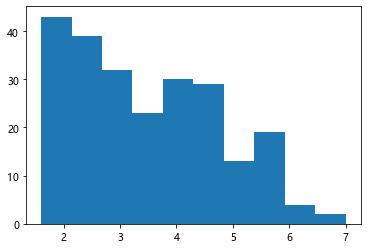

In [22]:
#绘制简单的直方图
plt.hist(df.displ
        #,bins = 5 #条的个数
        #,range = (df.displ.min(), df.displ.max()) #x轴的取值范围
        #,range =(2,5)
        #,density = True #纵坐标是频率
        #,cumulative = True #累计频数或频率
        #,histtype = 'step'
        #,align = 'mid' #条形与坐标轴的位置关系
        #,orientation = 'horizontal'
        #,stacked = True
        )

### 4.1.4 绘制连续变量直方图

In [23]:
df.loc[:,['displ','class']]

,displ,class
0,1.8,compact
1,1.8,compact
2,2.0,compact
3,2.0,compact
4,2.8,compact
...,...,...
229,2.0,midsize
230,2.0,midsize
231,2.8,midsize
232,2.8,midsize


In [24]:
df_agg = df.loc[:,['displ','class']].groupby('class')

In [25]:
df_agg

In [26]:
[*df_agg]

[('2seater',
      displ    class
  23    5.7  2seater
  24    5.7  2seater
  25    6.2  2seater
  26    6.2  2seater
  27    7.0  2seater),
 ('compact',
       displ    class
  0      1.8  compact
  1      1.8  compact
  2      2.0  compact
  3      2.0  compact
  4      2.8  compact
  5      2.8  compact
  6      3.1  compact
  7      1.8  compact
  8      1.8  compact
  9      2.0  compact
  10     2.0  compact
  11     2.8  compact
  12     2.8  compact
  13     3.1  compact
  14     3.1  compact
  141    2.4  compact
  142    2.4  compact
  169    2.5  compact
  170    2.5  compact
  171    2.5  compact
  172    2.5  compact
  186    2.2  compact
  187    2.2  compact
  188    2.4  compact
  189    2.4  compact
  190    3.0  compact
  191    3.0  compact
  192    3.3  compact
  193    1.8  compact
  194    1.8  compact
  195    1.8  compact
  196    1.8  compact
  197    1.8  compact
  207    2.0  compact
  208    2.0  compact
  209    2.0  compact
  210    2.0  compact
  211    2

In [27]:
for i, df0 in df_agg:
    print(i, df0)

2seater     displ    class
23    5.7  2seater
24    5.7  2seater
25    6.2  2seater
26    6.2  2seater
27    7.0  2seater
compact      displ    class
0      1.8  compact
1      1.8  compact
2      2.0  compact
3      2.0  compact
4      2.8  compact
5      2.8  compact
6      3.1  compact
7      1.8  compact
8      1.8  compact
9      2.0  compact
10     2.0  compact
11     2.8  compact
12     2.8  compact
13     3.1  compact
14     3.1  compact
141    2.4  compact
142    2.4  compact
169    2.5  compact
170    2.5  compact
171    2.5  compact
172    2.5  compact
186    2.2  compact
187    2.2  compact
188    2.4  compact
189    2.4  compact
190    3.0  compact
191    3.0  compact
192    3.3  compact
193    1.8  compact
194    1.8  compact
195    1.8  compact
196    1.8  compact
197    1.8  compact
207    2.0  compact
208    2.0  compact
209    2.0  compact
210    2.0  compact
211    2.8  compact
212    1.9  compact
213    2.0  compact
214    2.0  compact
215    2.0  compact
216    2.0

In [28]:
df0['displ'].values.tolist()

[5.3,
 5.3,
 5.3,
 5.7,
 6.0,
 5.3,
 5.3,
 5.7,
 6.5,
 3.9,
 4.7,
 4.7,
 4.7,
 5.2,
 5.7,
 5.9,
 4.6,
 5.4,
 5.4,
 4.0,
 4.0,
 4.0,
 4.0,
 4.6,
 5.0,
 3.0,
 3.7,
 4.0,
 4.7,
 4.7,
 4.7,
 5.7,
 6.1,
 4.0,
 4.2,
 4.4,
 4.6,
 5.4,
 5.4,
 5.4,
 4.0,
 4.0,
 4.6,
 5.0,
 3.3,
 3.3,
 4.0,
 5.6,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.7,
 2.7,
 3.4,
 3.4,
 4.0,
 4.7,
 4.7,
 5.7]

In [29]:
#提取出每一款车型的发动机排量
vals = [df0['displ'].values.tolist() for i, df0 in df_agg]

In [30]:
vals

[[5.7, 5.7, 6.2, 6.2, 7.0],
 [1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.1,
  1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.1,
  3.1,
  2.4,
  2.4,
  2.5,
  2.5,
  2.5,
  2.5,
  2.2,
  2.2,
  2.4,
  2.4,
  3.0,
  3.0,
  3.3,
  1.8,
  1.8,
  1.8,
  1.8,
  1.8,
  2.0,
  2.0,
  2.0,
  2.0,
  2.8,
  1.9,
  2.0,
  2.0,
  2.0,
  2.0,
  2.5,
  2.5,
  2.8,
  2.8],
 [2.8,
  3.1,
  4.2,
  2.4,
  2.4,
  3.1,
  3.5,
  3.6,
  2.4,
  2.4,
  2.4,
  2.4,
  2.5,
  2.5,
  3.3,
  2.5,
  2.5,
  3.5,
  3.5,
  3.0,
  3.0,
  3.5,
  3.1,
  3.8,
  3.8,
  3.8,
  5.3,
  2.2,
  2.2,
  2.4,
  2.4,
  3.0,
  3.0,
  3.5,
  1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.6],
 [2.4, 3.0, 3.3, 3.3, 3.3, 3.3, 3.3, 3.8, 3.8, 3.8, 4.0],
 [3.7,
  3.7,
  3.9,
  3.9,
  4.7,
  4.7,
  4.7,
  5.2,
  5.2,
  4.7,
  4.7,
  4.7,
  4.7,
  4.7,
  4.7,
  5.2,
  5.2,
  5.7,
  5.9,
  4.2,
  4.2,
  4.6,
  4.6,
  4.6,
  5.4,
  5.4,
  2.7,
  2.7,
  2.7,
  3.4,
  3.4,
  4.0,
  4.0],
 [3.8,
  3.8,
  4.0,
  4.0,
  4.6,
  4.6,
  4.6,
  4.6,
  5.4,
 

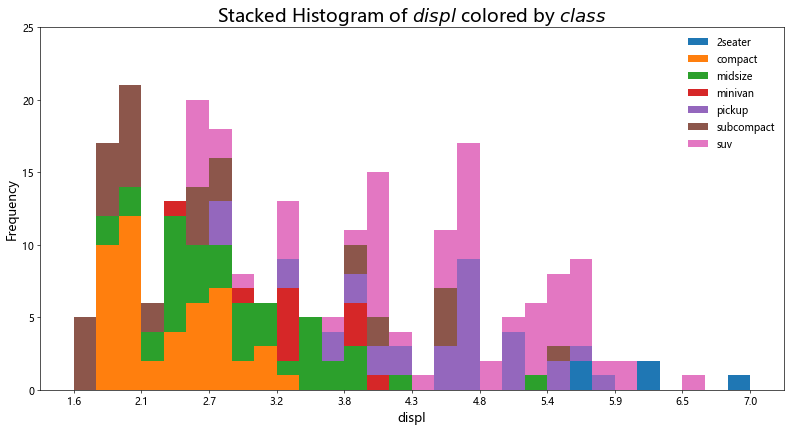

In [34]:
#绘制连续变量直方图
plt.figure(figsize = (16,8), dpi = 60) #创建画布
n, bins, patches = plt.hist(vals, 30, stacked = True) #绘制堆叠直方图

#添加装饰
plt.title('Stacked Histogram of $displ$ colored by $class$', fontsize = 22) #添加标题
plt.xlabel('displ', fontsize = 15) #x轴标题
plt.ylabel('Frequency', fontsize = 15) #y轴标题
plt.xticks(bins[::3], [round(b,1) for b in bins[::3]], fontsize = 12) #x轴刻度
plt.yticks(fontsize = 12) #y轴刻度字体
plt.ylim(0, 25) #y轴刻度范围
plt.legend(np.unique(df['class'])
          ,frameon = False #去掉图例的框
          ,fontsize = 12 #图例大小
          ) #添加图例

### 4.1.5 源码及图像解读

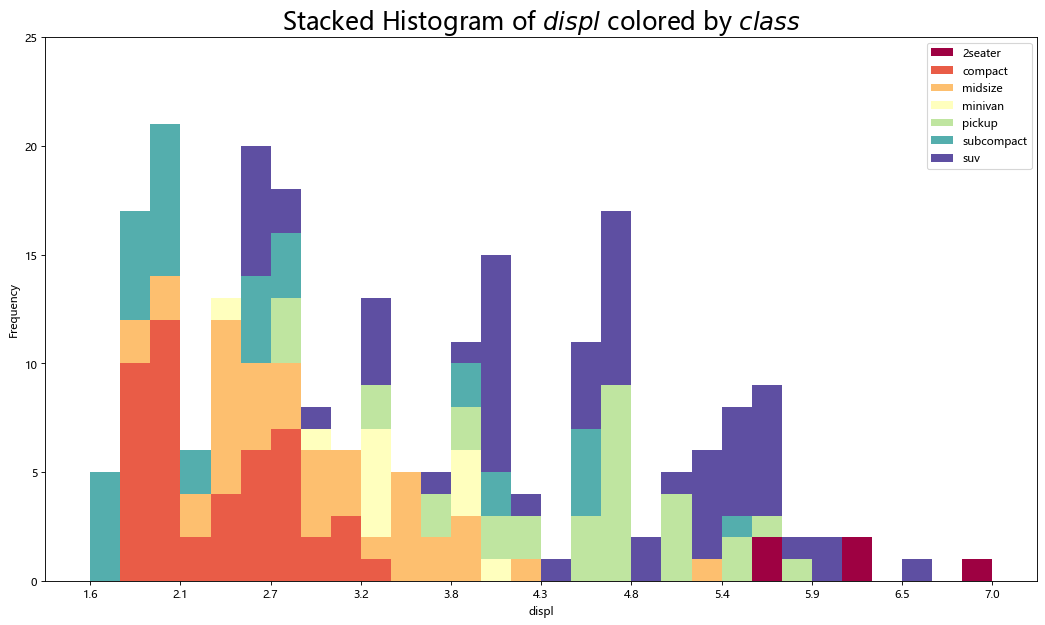

In [36]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ' #横坐标所需特征
groupby_var = 'class' #分类变量
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var) #根据分类变量将所需数据分组
vals = [df[x_var].values.tolist() for i, df in df_agg] #提取出每一组中的数据

# Draw
plt.figure(figsize=(16,9), dpi= 80) #创建画布并设定画布大小
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))] #生成颜色列表
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)]) #绘制直方图

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])}) #添加图例
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22) #添加标题
plt.xlabel(x_var) #添加x轴标题
plt.ylabel("Frequency") #添加y轴标题
plt.ylim(0, 25) #设定y轴刻度范围
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]]) #设定x轴刻度
plt.show() #显示本地图形

In [35]:
plt.cm.Spectral?

In [38]:
len(vals)

7

In [39]:
[plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

发动机排量大部分在5以下，两座的车发动机排量都在5以上，compact车型的发动机排量大部分在1-3之间；还可以看出在同一个排量下，有多少种类的车，每种车的占比如何。